<a href="https://colab.research.google.com/github/firdaaacy/COVID-APP/blob/main/Manual_Model_Inception_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Load

In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

Download the dataset from its original source by running the cell below. 

Note that the `zip` file that contains the images is unzipped under the `/tmp` directory.

In [2]:

!wget --no-check-certificate \
    "https://drive.google.com/u/0/uc?id=16S4zn1SMGOKvoRC1bn5LCQn1xmPvEH58&export=download&confirm=t" \
    -O "/tmp/data.zip"

local_zip = '/tmp/data.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2022-06-08 05:10:36--  https://drive.google.com/u/0/uc?id=16S4zn1SMGOKvoRC1bn5LCQn1xmPvEH58&export=download&confirm=t
Resolving drive.google.com (drive.google.com)... 74.125.195.101, 74.125.195.113, 74.125.195.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.101|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=16S4zn1SMGOKvoRC1bn5LCQn1xmPvEH58&export=download&confirm=t [following]
--2022-06-08 05:10:36--  https://drive.google.com/uc?id=16S4zn1SMGOKvoRC1bn5LCQn1xmPvEH58&export=download&confirm=t
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5h6mmkh9c85l9uknjvr4hs6defieacn9/1654665000000/10501907559150766263/*/16S4zn1SMGOKvoRC1bn5LCQn1xmPvEH58?e=download [following]
--2022-06-08 05:10:36--  https://doc-0s-6c-docs.googleusercontent.com/docs/secur

### Labeling

In [3]:
root_dir = '/tmp/faces'

if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):
  """
  Creates directories for the train and test sets
  
  Args:
    root_path (string) - the base directory path to create subdirectories from
  
  Returns:
    None
  """  

  os.makedirs(root_path + '/training')
  os.makedirs(root_path + '/validation')
  os.makedirs(root_path + '/training/open-mouth')
  os.makedirs(root_path + '/training/puff-cheeck')
  os.makedirs(root_path + '/training/show-teeth')
  os.makedirs(root_path + '/training/smile')
  os.makedirs(root_path + '/training/sneer')
  
  os.makedirs(root_path + '/validation/open-mouth')
  os.makedirs(root_path + '/validation/puff-cheeck')
  os.makedirs(root_path + '/validation/show-teeth')
  os.makedirs(root_path + '/validation/smile')
  os.makedirs(root_path + '/validation/sneer')

  
try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [4]:
# Test your create_train_val_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/faces/validation
/tmp/faces/training
/tmp/faces/validation/open-mouth
/tmp/faces/validation/sneer
/tmp/faces/validation/puff-cheeck
/tmp/faces/validation/show-teeth
/tmp/faces/validation/smile
/tmp/faces/training/open-mouth
/tmp/faces/training/sneer
/tmp/faces/training/puff-cheeck
/tmp/faces/training/show-teeth
/tmp/faces/training/smile


In [5]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):

  """
  Splits the data into train and test sets
  
  Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training
    
  Returns:
    None
  """

  files = []
  for path in os.listdir(SOURCE_DIR):
    if os.path.getsize(SOURCE_DIR + path) > 0:
      files.append(SOURCE_DIR + path)
    else:
      print(path+' is zero length, so ignoring.')


  random_trainfile = random.sample(files, int(SPLIT_SIZE*len(files)))

  for path in random_trainfile:
    copyfile(SOURCE_DIR + path[path.rfind('/')+1 : ], TRAINING_DIR + path[path.rfind('/')+1 : ])

  random_testingfiles = list(set(files)-set(random_trainfile))
  random_testingfile = random.sample(random_testingfiles, len(random_testingfiles))
  
  for path in random_testingfile:
    copyfile(SOURCE_DIR + path[path.rfind('/')+1 : ], VALIDATION_DIR + path[path.rfind('/')+1 : ])


In [6]:
om_dir = "/tmp/face/open-mouth/"
smile_dir = "/tmp/face/smile/"
puff_dir = "/tmp/face/puff-cheeks/"
show_dir = "/tmp/face/show-teeth/"
sneer_dir = "/tmp/face/sneer-on-one-side/"

TRAINING_DIR = "/tmp/faces/training/"
VALIDATION_DIR = "/tmp/faces/validation/"

TRAINING_SMILE_DIR = os.path.join(TRAINING_DIR, "smile/")
VALIDATION_SMILE_DIR = os.path.join(VALIDATION_DIR, "smile/")

TRAINING_sneer_DIR = os.path.join(TRAINING_DIR, "sneer/")
VALIDATION_sneer_DIR = os.path.join(VALIDATION_DIR, "sneer/")

TRAINING_show_DIR = os.path.join(TRAINING_DIR, "show-teeth/")
VALIDATION_show_DIR = os.path.join(VALIDATION_DIR, "show-teeth/")

TRAINING_puff_DIR = os.path.join(TRAINING_DIR, "puff-cheeck/")
VALIDATION_puff_DIR = os.path.join(VALIDATION_DIR, "puff-cheeck/")

TRAINING_open_DIR = os.path.join(TRAINING_DIR, "open-mouth/")
VALIDATION_open_DIR = os.path.join(VALIDATION_DIR, "open-mouth/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_SMILE_DIR)) > 0:
  for file in os.scandir(TRAINING_SMILE_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_sneer_DIR)) > 0:
  for file in os.scandir(TRAINING_sneer_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_show_DIR)) > 0:
  for file in os.scandir(TRAINING_show_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_puff_DIR)) > 0:
  for file in os.scandir(TRAINING_puff_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_open_DIR)) > 0:
  for file in os.scandir(TRAINING_open_DIR):
    os.remove(file.path)


if len(os.listdir(VALIDATION_SMILE_DIR)) > 0:
  for file in os.scandir(VALIDATION_SMILE_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_sneer_DIR)) > 0:
  for file in os.scandir(VALIDATION_sneer_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_show_DIR)) > 0:
  for file in os.scandir(VALIDATION_show_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_puff_DIR)) > 0:
  for file in os.scandir(VALIDATION_puff_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_open_DIR)) > 0:
  for file in os.scandir(VALIDATION_open_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .8

split_data(om_dir, TRAINING_open_DIR, VALIDATION_open_DIR, split_size)
split_data(smile_dir, TRAINING_SMILE_DIR, VALIDATION_SMILE_DIR, split_size)
split_data(puff_dir, TRAINING_puff_DIR, VALIDATION_puff_DIR, split_size)
split_data(show_dir, TRAINING_show_DIR, VALIDATION_show_DIR, split_size)
split_data(sneer_dir, TRAINING_sneer_DIR, VALIDATION_sneer_DIR, split_size)

In [7]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators
  
  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images
    
  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1/255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=25,
                                                      class_mode='categorical',
                                                      shuffle=True,
                                                      target_size=(256, 256))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1/255)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=100,
                                                                class_mode='categorical',
                                                                shuffle=True,
                                                                target_size=(256, 256))
  return train_generator, validation_generator

In [8]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 720 images belonging to 5 classes.
Found 180 images belonging to 5 classes.


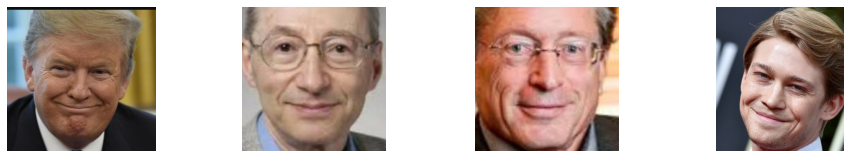

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt                                                     #Mengimpor modul matplotlib
import matplotlib.image as mpimg

nrows = 3                                                                           #Jumlah baris tampilan gambar
ncols = 4                                                                           #Jumlah baris tampilan gambar

pic_index = 0                                                                        #Index awal untuk iterasi gambar

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 3)                                           #Mengatur gambar output matplotlib, dan ukurannya agar menjadi 4*6 gambar
                                   
file_smile = os.listdir(TRAINING_SMILE_DIR)                                           #Mendaftar file di dalam folder


pic_index += 4                                                                      #Index tambah bertambah 4 setiap baris
gbr_tampil_smile  = [os.path.join(TRAINING_SMILE_DIR, fname)                              #Menampilkan gambar
                      for fname in file_smile[pic_index-4:pic_index]]

for i, img_path in enumerate(gbr_tampil_smile):
  sp = plt.subplot(nrows, ncols, i + 1)                                             #Mengatur subplot; indeks subplot dimulai dari 1
  sp.axis('Off')                                                                    #Tidak menampilkan Gridlines

  img = mpimg.imread(img_path)
  plt.imshow(img)
  


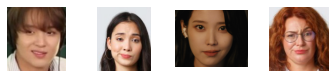

In [10]:
file_smirk = os.listdir(TRAINING_sneer_DIR)                                           #Mendaftar file di dalam folder gunting

pic_index += 4                                                                      #Index tambah bertambah 4 setiap baris
gbr_tampil_smile  = [os.path.join(TRAINING_sneer_DIR, fname)                              #Menampilkan gambar gunting
                      for fname in file_smirk[pic_index-4:pic_index]]

for i, img_path in enumerate(gbr_tampil_smile):
  sp = plt.subplot(nrows, ncols, i + 1)                                             #Mengatur subplot; indeks subplot dimulai dari 1
  sp.axis('Off')                                                                    #Tidak menampilkan Gridlines

  img = mpimg.imread(img_path)
  plt.imshow(img)

In [11]:
from tensorflow.keras.optimizers import Adam

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.82):
      print("\nReached 0.82 % val accuracy so cancelling training!")
      self.model.stop_training = True

#Manual Model

In [12]:
from tensorflow.keras.optimizers import Adam

In [55]:
# GRADED FUNCTION: create_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
def create_model():
  # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
  # USE AT LEAST 3 CONVOLUTION LAYERS

  ### START CODE HERE

  model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Dropout(rate=0.01),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Dropout(rate=0.01),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Dropout(rate=0.01),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
  ])

  model.compile(optimizer=RMSprop(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy']) 
    
  ### END CODE HERE

  return model


Now it is time to train your model!

Note: You can ignore the `UserWarning: Possibly corrupt EXIF data.` warnings.

In [56]:
# Get the untrained model
model = create_model()
callbacks = myCallback()

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    steps_per_epoch = 5,
                    epochs=50,
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks=[callbacks])

Epoch 1/50
5/5 [==============================] - 17s 3s/step - loss: 93.4319 - accuracy: 0.1840 - val_loss: 1.6496 - val_accuracy: 0.2240
Epoch 2/50
5/5 [==============================] - 5s 1s/step - loss: 1.6379 - accuracy: 0.1760 - val_loss: 1.6107 - val_accuracy: 0.2083
Epoch 3/50
5/5 [==============================] - 7s 1s/step - loss: 1.6129 - accuracy: 0.2080 - val_loss: 1.6086 - val_accuracy: 0.2188
Epoch 4/50
5/5 [==============================] - 4s 875ms/step - loss: 1.6125 - accuracy: 0.1600 - val_loss: 1.6092 - val_accuracy: 0.2135
Epoch 5/50
5/5 [==============================] - 5s 993ms/step - loss: 1.6090 - accuracy: 0.1727 - val_loss: 1.6099 - val_accuracy: 0.1823
Epoch 6/50
5/5 [==============================] - 4s 750ms/step - loss: 1.6114 - accuracy: 0.1920 - val_loss: 1.6104 - val_accuracy: 0.1875
Epoch 7/50
5/5 [==============================] - 4s 763ms/step - loss: 1.6120 - accuracy: 0.2240 - val_loss: 1.6071 - val_accuracy: 0.2396
Epoch 8/50
5/5 [===========

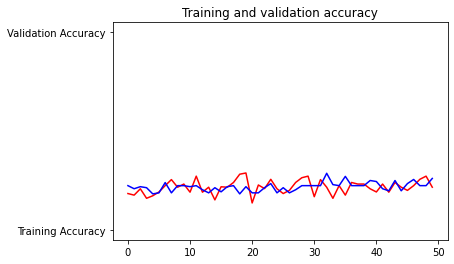

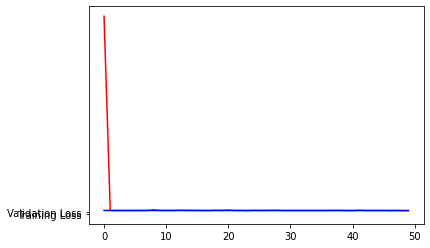

In [58]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

#Transfer learning INCEPTIONV3


In [13]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-06-08 05:11:00--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.128, 173.194.202.128, 173.194.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   285MB/s    in 0.3s    

2022-06-08 05:11:01 (285 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [14]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (256, 256, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

In [15]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [16]:

last_layer = pre_trained_model.get_layer('mixed9')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 6, 6, 2048)


In [17]:
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (5, activation='softmax')(x)           

# Append the dense network to the base model
model = Model(pre_trained_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [18]:
# Set the training parameters
model.compile(optimizer = Adam(learning_rate=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [19]:
tf.keras.backend.clear_session()

In [20]:
callbacks = myCallback()

history = model.fit(
            train_generator,
                    steps_per_epoch = 5,
                    epochs=50,
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks=[callbacks]
                    )

Epoch 1/50
5/5 [==============================] - 23s 2s/step - loss: 1.7446 - accuracy: 0.2160 - val_loss: 1.4963 - val_accuracy: 0.3111
Epoch 2/50
5/5 [==============================] - 3s 649ms/step - loss: 1.3912 - accuracy: 0.4640 - val_loss: 1.4565 - val_accuracy: 0.3889
Epoch 3/50
5/5 [==============================] - 3s 658ms/step - loss: 1.0646 - accuracy: 0.5920 - val_loss: 1.3018 - val_accuracy: 0.4889
Epoch 4/50
5/5 [==============================] - 4s 822ms/step - loss: 1.1828 - accuracy: 0.5000 - val_loss: 1.1702 - val_accuracy: 0.4889
Epoch 5/50
5/5 [==============================] - 3s 650ms/step - loss: 1.2528 - accuracy: 0.5200 - val_loss: 1.0828 - val_accuracy: 0.5722
Epoch 6/50
5/5 [==============================] - 3s 661ms/step - loss: 1.0850 - accuracy: 0.5520 - val_loss: 1.1487 - val_accuracy: 0.5389
Epoch 7/50
5/5 [==============================] - 3s 655ms/step - loss: 0.9813 - accuracy: 0.6400 - val_loss: 1.0069 - val_accuracy: 0.6167
Epoch 8/50
5/5 [======

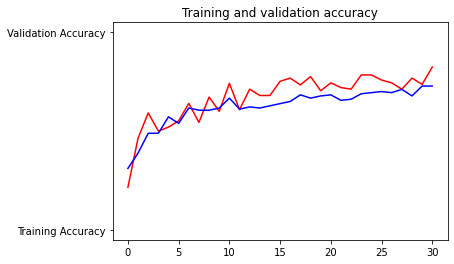

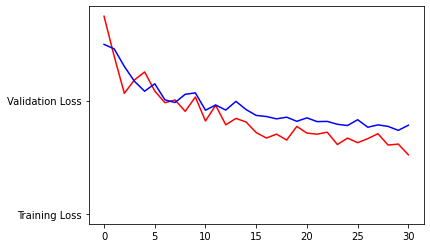

In [22]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

#Testing

Saving WhatsApp Image 2022-06-07 at 1.00.43 PM (1).jpeg to WhatsApp Image 2022-06-07 at 1.00.43 PM (1).jpeg
Saving WhatsApp Image 2022-06-07 at 1.00.43 PM (2).jpeg to WhatsApp Image 2022-06-07 at 1.00.43 PM (2).jpeg
Saving WhatsApp Image 2022-06-07 at 1.00.43 PM (3).jpeg to WhatsApp Image 2022-06-07 at 1.00.43 PM (3).jpeg
Saving WhatsApp Image 2022-06-07 at 1.00.43 PM.jpeg to WhatsApp Image 2022-06-07 at 1.00.43 PM.jpeg
Saving WhatsApp Image 2022-06-07 at 1.00.44 PM.jpeg to WhatsApp Image 2022-06-07 at 1.00.44 PM.jpeg
Saving WhatsApp Image 2022-06-07 at 11.46.22 AM.jpeg to WhatsApp Image 2022-06-07 at 11.46.22 AM.jpeg
Saving WhatsApp Image 2022-06-07 at 11.46.23 AM (1).jpeg to WhatsApp Image 2022-06-07 at 11.46.23 AM (1).jpeg
Saving WhatsApp Image 2022-06-07 at 11.46.23 AM.jpeg to WhatsApp Image 2022-06-07 at 11.46.23 AM.jpeg
Saving WhatsApp Image 2022-06-07 at 11.46.24 AM (1).jpeg to WhatsApp Image 2022-06-07 at 11.46.24 AM (1).jpeg
Saving WhatsApp Image 2022-06-07 at 11.46.24 AM.jpeg

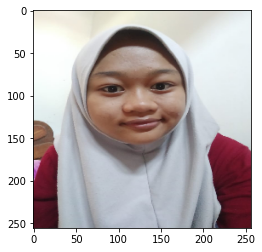

open-mouth: 23.31%
puff-cheeck: 1.40%
show-teeth: 35.82%
smile: 18.37%
sneer: 21.11%


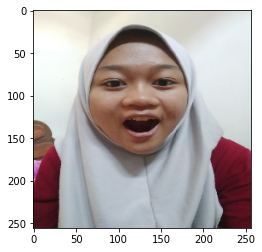

open-mouth: 62.16%
puff-cheeck: 0.47%
show-teeth: 17.92%
smile: 5.61%
sneer: 13.83%


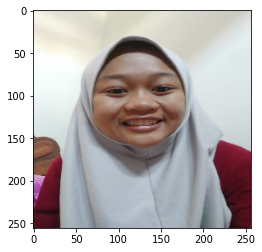

open-mouth: 18.93%
puff-cheeck: 0.36%
show-teeth: 50.87%
smile: 20.91%
sneer: 8.94%


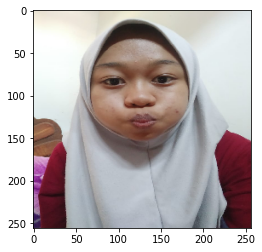

open-mouth: 15.76%
puff-cheeck: 4.77%
show-teeth: 36.35%
smile: 33.72%
sneer: 9.41%


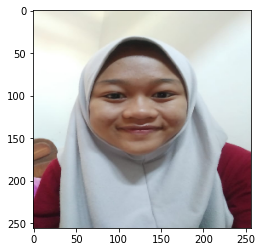

open-mouth: 22.56%
puff-cheeck: 1.14%
show-teeth: 40.06%
smile: 15.25%
sneer: 20.99%


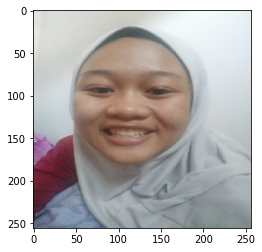

open-mouth: 2.00%
puff-cheeck: 0.04%
show-teeth: 94.92%
smile: 2.77%
sneer: 0.27%


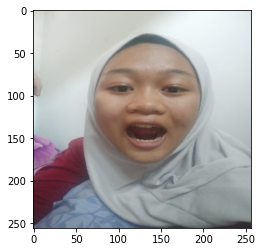

open-mouth: 24.54%
puff-cheeck: 0.24%
show-teeth: 74.35%
smile: 0.65%
sneer: 0.22%


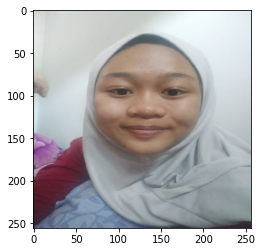

open-mouth: 10.69%
puff-cheeck: 0.63%
show-teeth: 82.23%
smile: 5.64%
sneer: 0.81%


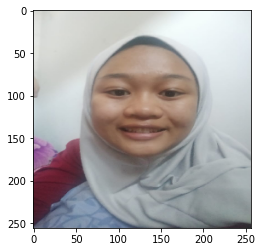

open-mouth: 4.67%
puff-cheeck: 0.23%
show-teeth: 91.17%
smile: 3.32%
sneer: 0.60%


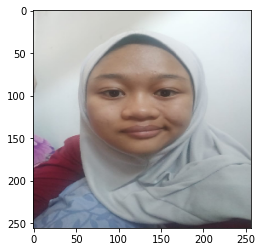

open-mouth: 1.63%
puff-cheeck: 0.21%
show-teeth: 94.45%
smile: 3.26%
sneer: 0.44%


In [24]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
# from tensorflow.keras.applications.inceptionv3 import preprocess_input

labels = train_generator.class_indices.keys()
uploaded = files.upload()

for paths in uploaded.keys():
 
  # predicting images
  path = paths
  img = image.load_img(path, target_size=(256, 256))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = tf.keras.applications.inception_v3.preprocess_input(x)

  images = np.vstack([x])
  proba = model.predict(images)[0]
  plt.imshow(img)
  plt.show()
  for (label, p) in zip(labels, proba):
    print("{}: {:.2f}%".format(label, p * 100))